In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 


import pickle

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [5]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

### Importing Segmentation Models 

In [6]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [7]:
pca = pickle.load(open('pca.pickle' , 'rb'))

In [8]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### Standardization 

In [9]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [10]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### Kmeans Pca

In [11]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [12]:
df_purchase_predictors = df_purchase.copy()

In [13]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive analysis by segments 

### Data Analysis by Customer 

In [14]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [15]:
## first we need the number of visits by customer 

temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence' : 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [16]:
## find the n.purchace 
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence' : 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [17]:
# Calculate the purchase frequency 
temp3['Average_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [18]:
# find which segment each customer belong to 

temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


#### Segment Porportion 

In [19]:
segm_prop = df_purchase_descr[['Segment', 'N_Purchases']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N_Purchases' : 'Segment Porportions'})
segm_prop.head()

,Segment Porportions
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


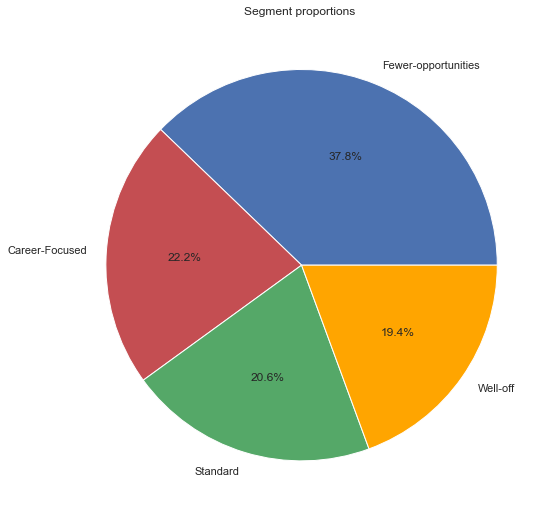

In [24]:
# Plot the result in a pie chart 

plt.figure(figsize=(12,9))
plt.pie(segm_prop['Segment Porportions'], 
        labels = ['Fewer-opportunities', 'Career-Focused', 'Standard', 'Well-off'],
        autopct= '%1.1f%%',
        colors = ('b', 'r', 'g', 'orange'))

plt.title('Segment proportions ')
plt.show()

### Purchase Occasions and purchase incidences by Segment 

In [25]:
# first we get the mean of total visits by segment 
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_Purchases
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [26]:
# calcuate the standard deviation for segments
segments_std = df_purchase_descr.groupby(['Segment']).std()

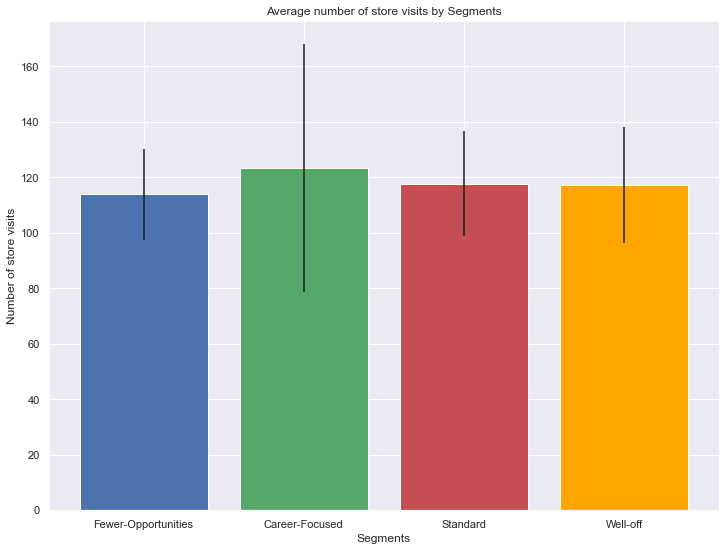

In [28]:
# How often do peaple from different segments visit the store ? 
plt.figure(figsize=(12,9))
plt.bar(x = (0,1,2,3),
        tick_label = ('Fewer-Opportunities','Career-Focused','Standard','Well-off'),
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segments')
plt.ylabel('Number of store visits')
plt.title('Average number of store visits by Segments')
plt.show()
                            


### The most average segment visit the store is the career ficused, although  this segment has the hieghest standard deviation this means that the customer in this segment are the least homogeneous among the other



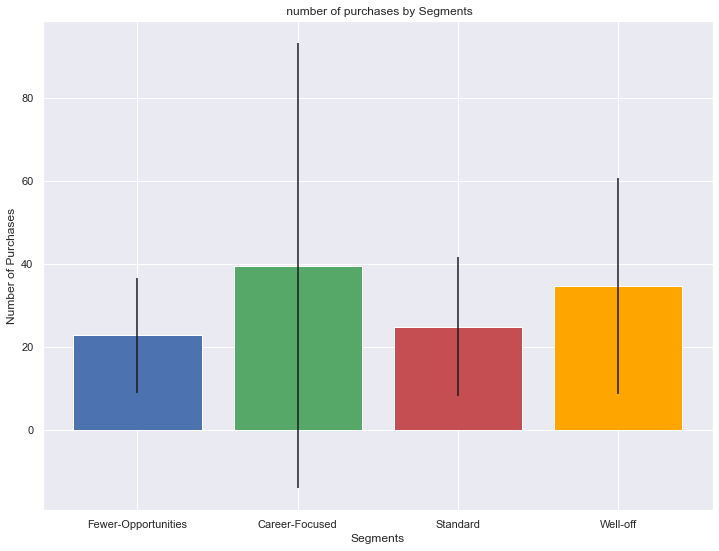

In [30]:
## How often the client buy a product ?

plt.figure(figsize=(12,9))
plt.bar(x = (0,1,2,3),
        tick_label = ('Fewer-Opportunities','Career-Focused','Standard','Well-off'),
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segments')
plt.ylabel('Number of Purchases')
plt.title(' number of purchases by Segments')
plt.show()
             

### same as the number of visits, N.Purchases is high in Career-focused segment but also with the highest Standard deviation by far 

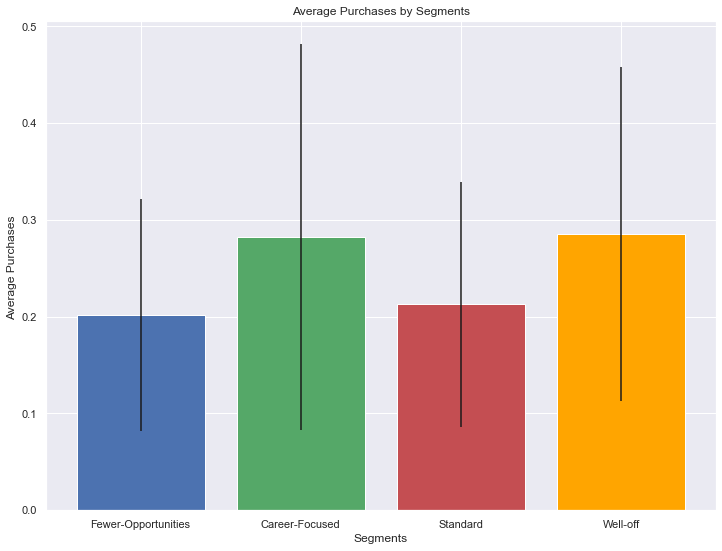

In [31]:
# Plot the average purchases 

plt.figure(figsize=(12,9))
plt.bar(x = (0,1,2,3),
        tick_label = ('Fewer-Opportunities','Career-Focused','Standard','Well-off'),
        height = segments_mean['Average_Purchases'],
        yerr = segments_std['Average_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segments')
plt.ylabel('Average Purchases ')
plt.title('Average Purchases by Segments')
plt.show()

## Brand Choise 

In [32]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [33]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_' )
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [34]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [35]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

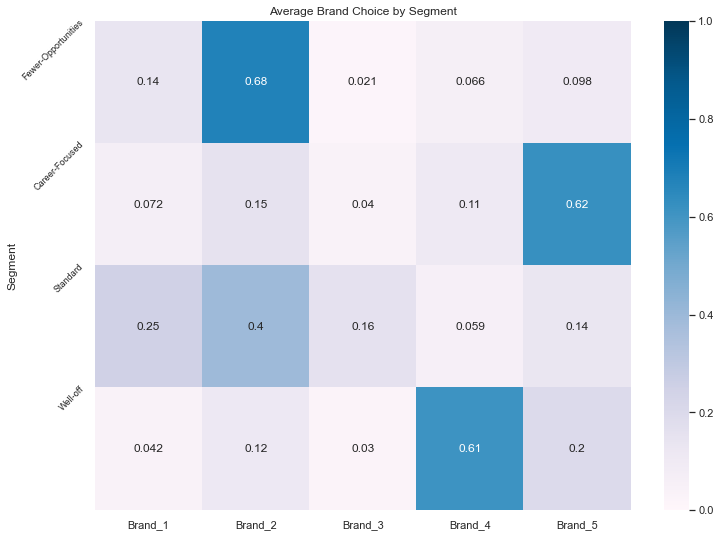

In [37]:
# plot the results 
plt.figure(figsize=(12,9))
sns.heatmap(mean_brand_choice, 
            vmin = 0,
            vmax = 1, 
            cmap = 'PuBu',
            annot = True)
plt.yticks([0,1,2,3], ['Fewer-Opportunities','Career-Focused','Standard','Well-off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

- we found that fewer opportunity segment has strong preference on brand 2, while career focused segment has stromg preferance in Brand 5 which is the most expensive brand they like fancy products, 
- strange enough that the well off segment has preferance on the brand 4 by 61% 
- last the Standard segment has midrange preferance in 3 brands 1,2,3 with 25%,40%,16% respectivly 

## Revenue 

### Calculate the revenue for each brand and total by segment 

In [39]:
# Calculate the revenue for Brand 1 

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index=False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [40]:
# Calculate the revenue for brand 2


temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index=False).sum()


C:\Users\7emdan\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\7emdan\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
# Calculate the revenue for brand 3


temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index=False).sum()


In [42]:
# Calculate the revenue for brand 4


temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index=False).sum()


In [43]:
# Calculate the revenue for brand 5


temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index=False).sum()


In [44]:
# Calculate the total revenues 

segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1']+
                                           segments_brand_revenue['Revenue Brand 2']+
                                           segments_brand_revenue['Revenue Brand 3']+
                                           segments_brand_revenue['Revenue Brand 4']+
                                           segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13909.78,722.06,1805.59,2214.82,20911.15
1,1,736.09,1791.78,664.75,2363.84,19456.74,25013.20
2,2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,3,699.47,1298.23,725.54,14009.29,5509.69,22242.22


In [46]:
# adding the segment proportion to the revenue table 
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Porportions']

segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0: 'fewer-opportunity',
                                                                           1: 'career focused', 
                                                                           2: 'standard', 
                                                                           3:'well-off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
fewer-opportunity,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
career focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
well-off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194


- Career-Focused brings the highest revenue even it's the second largest in porportions,well that because they buy the most expensive brand followed by well off and fewer opportunity 
- Standard has the lowest revenue among all segments 
- well off and fewer opportunities segmenst spend almost the amount of money although fewer opportunity has almost douple the proportion 